# Линейные классификаторы


In [8]:
import numpy as np
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
irises = load_iris()
data = irises['data'][50:, 2:]
target = irises['target'][50:] - 1
target_names = irises['target_names'][1:]
colors = np.array(['green', 'blue'])

sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

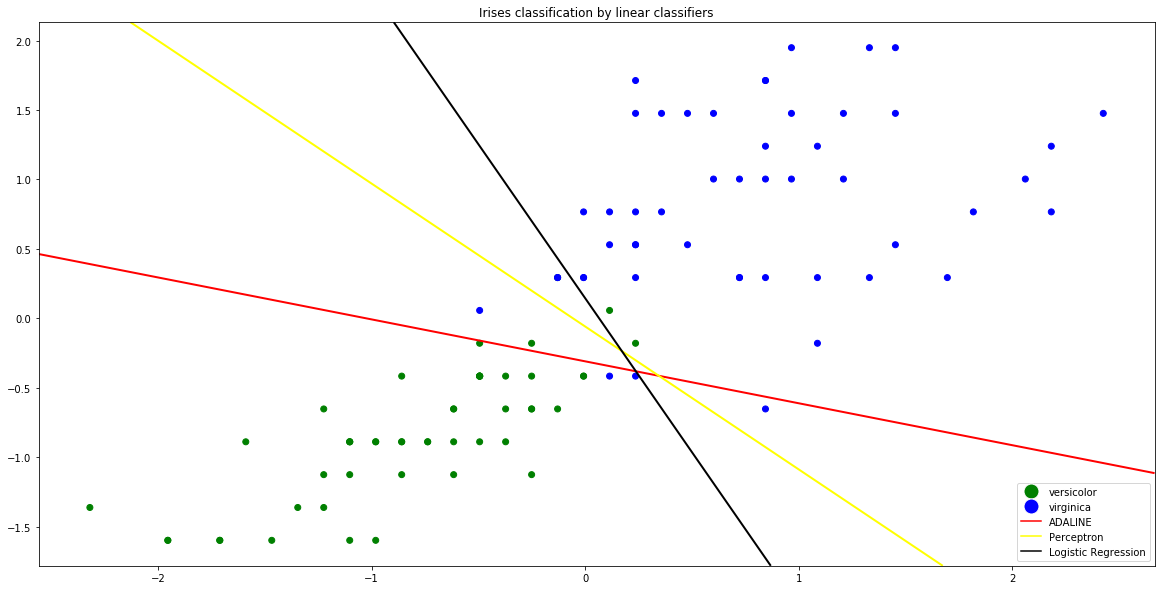

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(data[:, 0], data[:, 1], color=colors[target])
handlers = [Line2D([0], [0], marker='o', color='w', label=target_names[i], 
            markerfacecolor=colors[i], markersize=15) for i in range(0, len(colors))]
handlers.append(Line2D([0], [0], color='red', label='ADALINE'))
handlers.append(Line2D([0], [0], color='yellow', label='Perceptron'))
handlers.append(Line2D([0], [0], color='black', label='Logistic Regression'))
ax.legend(handles=handlers, loc='lower right')
ax.set_title('Irises classification by linear classifiers')



x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
objects = np.c_[xx.ravel(), yy.ravel()]

clf = SGDClassifier(loss='squared_loss', max_iter=20000)
clf.fit(data, target)
Z = np.array([clf.decision_function([obj]) for obj in objects])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, [0], linewidths=2, colors='red')

clf = SGDClassifier(loss='perceptron', max_iter=20000)
clf.fit(data, target)
Z = np.array([clf.decision_function([obj]) for obj in objects])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, [0], linewidths=2, colors='yellow')

clf = SGDClassifier(loss='log', max_iter=20000)
clf.fit(data, target)
Z = np.array([clf.decision_function([obj]) for obj in objects])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, [0], linewidths=2, colors='black')

plt.show()